In [1037]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import math as math
import scipy as sp
from functools import reduce
%matplotlib inline


train = "HW_1_training.txt"
test  = "HW_1_testing.txt"

#this cell just sets things up

In [2]:

    ### load the data into pandas dataframe, print to check
train_df = pd.read_csv(train, sep="\t") #separator is always important; use "," for this small dataset
test_df = pd.read_csv(test, sep="\t")
test_df.head()

NameError: name 'pd' is not defined

In [435]:
    #calculate the mean vector and covariance matrix of each class based on the training data.
    mu = np.mean(train_df, axis =0) #arguments are (array, dimension to avg on). gives column avg
    mu1 = np.mean(train_df.query('Y>0'), axis = 0)
    mu0 = np.mean(train_df.query('Y==0'), axis = 0)
    mu0 = mu0[['X1','X2']]
    mu1 = mu1[['X1','X2']]
    dt1 = train_df.query('Y>0')
    dt0 = train_df.query('Y==0')
    c1 = np.cov(dt1[['X1','X2']], rowvar = 0)
    c0 = np.cov(dt0[['X1','X2']], rowvar = 0)
    #just printing to check
    mu0
    #c0
    print(c0)
    print(c1)
    #cov are not equal so general Bayed is used


[[ 4.06101606 -0.89500515]
 [-0.89500515  0.78273764]]
[[0.97609324 0.41802097]
 [0.41802097 1.38731049]]


In [1115]:
    #Construct a Bayesian decision boundary using prior calculated from the data    
    #prior is the mean of Y, the likelihood of a zero or one
p1 = mu[2]
p0 = 1 - mu[2]
def decision_boundary2(x1, x2):
        g0 = BayB0(np.array([x1, x2]))
        g1 = BayB1(np.array([x1, x2]))
        return g1-g0

    
def decision_boundary2b(x1, x2):
        g0 = BayB0(np.array([x1, x2]))
        g1 = BayB1(np.array([x1, x2]))
        return g0<g1

cin0 = (np.linalg.inv(c0))

cin1 = (np.linalg.inv(c1))
    #for two vect
def decision_boundary(x1,x2):
    #this part is from covInvers*(x-m)
        cx01 = cin0[0,0]*(x1-mu0[1]) + cin0[0,1]*(x2-mu0[1])
        cx02 = cin0[1,0]*(x1-mu0[1]) + cin0[1,1]*(x2-mu0[1])
        #this is (x-m)*(C(x-m))
        g1 = -0.5 *((x1-mu0[0])*cx01 + (x1-mu0[1])*cx02 ) -np.log(2*math.pi)-0.5*(np.log( np.linalg.det(c0))) +np.log(p0)
        cx11 = cin1[0,0]*(x1-mu1[1]) + cin1[0,1]*(x2-mu1[1])
        cx12 = cin1[1,0]*(x1-mu1[1]) + cin1[1,1]*(x2-mu1[1])
        g2 = -0.5*( (x1-mu1[0])*cx11 + (x1-mu1[1])*cx12) -np.log(2*math.pi)-0.5*(np.log( np.linalg.det(c1)))+np.log(p1)
        return g2 - g1

a0 = -0.5*cin0
b0 = cin0.dot(mu0)
c0b = -0.5*mu0.T.dot(b0)-0.5*(np.log(np.linalg.det(c0))) +np.log(p0)
#the Bayes boundary
BayB0 = lambda x: x.T.dot(a0.dot(x)) + b0.dot(x) + c0b
a1 = -0.5*cin1
b1 = cin1.dot(mu1)
c1b = -0.5*mu1.T.dot(b1)-0.5*(np.log(np.linalg.det(c1))) +np.log(p1)
#the Bayes boundary
BayB1 = lambda x: x.T.dot(a1.dot(x)) + b1.dot(x) + c1b


    
    
    
def decision_boundary3(x1,x2):
    #this part is from covInvers*(x-m)
        cx01 = cin0[0,0]*(x1-mu0[1]) + cin0[0,1]*(x2-mu0[1])
        cx02 = cin0[1,0]*(x1-mu0[1]) + cin0[1,1]*(x2-mu0[1])
        #this is (x-m)*(C(x-m))
        g1 = -0.5 *((x1-mu0[0])*cx01 + (x1-mu0[1])*cx02 ) -np.log(2*math.pi)-0.5*(np.log( np.linalg.det(c0))) +np.log(p0)
        cx11 = cin1[0,0]*(x1-mu1[1]) + cin1[0,1]*(x2-mu1[1])
        cx12 = cin1[1,0]*(x1-mu1[1]) + cin1[1,1]*(x2-mu1[1])
        g2 = -0.5*( (x1-mu1[0])*cx11 + (x1-mu1[1])*cx12) -np.log(2*math.pi)-0.5*(np.log( np.linalg.det(c1)))+np.log(p1)
        return g2> g1
#print(decision_boundary(1,1))
#then P(x|w)
#pxw = lambda x, m, c: -0.5 * (np.transpose(x-m))));

#the Bayes boundary
#BayB = lambda x: np.log(pxw(x,mu[0],cov)/pxw(x, mu[1],cov)) + np.log(p0/p1)
decision_boundary2(1,20)

202.33184019325932

I have here and have tried diffrent manipulations and computation orders of g(x) from the slides... none came out to well.
this is the best...


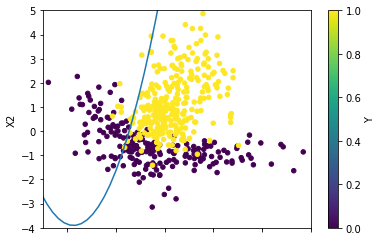

In [1116]:
#Plot the decision boundary on the scatter plots of the training data.
#first plot the data
plt = train_df.plot.scatter(x='X1', y='X2', c = 'Y', colormap='viridis')
#then plot the boundary
#BayB([xx,xx])

x_vec = np.linspace(*plt.get_xlim())
yy = list(map(decision_boundary2, x_vec,x_vec))
plt.plot(x_vec, yy)
plt.axis([-3, 8, -4, 5]);

print('I have here and have tried diffrent manipulations and computation orders of g(x) from the slides... none came out to well.\nthis is the best...')

In [1117]:
print('Still, I have trouble getting the matrix-vector operations to work (especially with Pandas)\nI\'m not sure that is why this is so bad..')

Still, I have trouble getting the matrix-vector operations to work (especially with Pandas)
I'm not sure that is why this is so bad..


In [541]:
#Calculate the classification error rate on the testing data. 
#if deci bound is positive, p(1) > p(0)
clss = lambda x1,x2: int(decision_boundary2b(x1, x2))
            
tx1 = test_df["X1"].tolist()
tx2 = test_df["X2"].tolist()
Truy = test_df["Y"].tolist()
#these are predicted
yt = list(map(clss, tx1, tx1))
#then see which inex are equal to observed
corec = list(map(lambda x,y: int(x==y), Truy,yt))
#since we booled, we can just sum
tot = reduce((lambda x,y: x + y), corec)
#get the ratio of correct
rate = tot/ len(Truy)
  

In [543]:
rate #weird! Better than I expected, with how bad the curve looked.

0.575

Point 


-403.748589034775

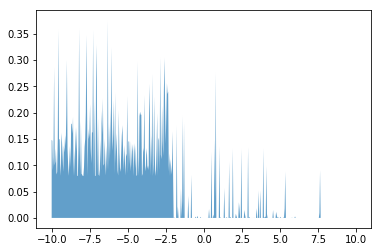

In [416]:
#estimate class-specific densities using kernel density estimator
#Bellow are the densities and the probabilities for the respictive points
#use Gaussian kernel with bandwidth of 0.1, 0.5, 2.
from sklearn.neighbors.kde import KernelDensity
# Gaussian 0.1, for class 0
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(train_df.query('Y==0')[['X1', 'X2']])
log_dens = kde.score_samples((train_df[['X1', 'X2']]))
x_d = np.linspace(-10, 10, 500)
plt.fill_between(x_d, np.exp(log_dens), alpha=0.7)


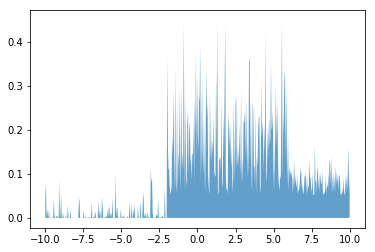

In [407]:
# Gaussian 0.1, for class 1
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(train_df.query('Y==1')[['X1', 'X2']])
log_dens = kde.score_samples((train_df[['X1', 'X2']]))
x_d = np.linspace(-10, 10, 500)
plt.fill_between(x_d, np.exp(log_dens), alpha=0.7)


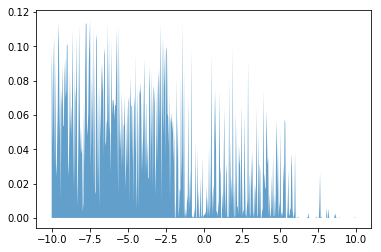

In [406]:
# Gaussian 0.5, for class 0
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(train_df.query('Y==0')[['X1', 'X2']])
log_dens = kde.score_samples((train_df[['X1', 'X2']]))
x_d = np.linspace(-10, 10, 500)
plt.fill_between(x_d, np.exp(log_dens), alpha=0.7)

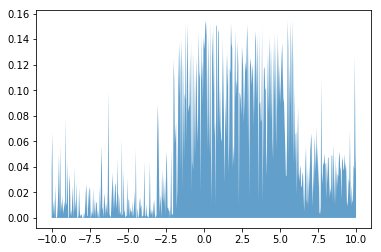

In [405]:
# Gaussian 0.5, for class 
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(train_df.query('Y==1')[['X1', 'X2']])
log_dens = kde.score_samples((train_df[['X1', 'X2']]))
x_d = np.linspace(-10, 10, 500)
plt.fill_between(x_d, np.exp(log_dens), alpha=0.7)

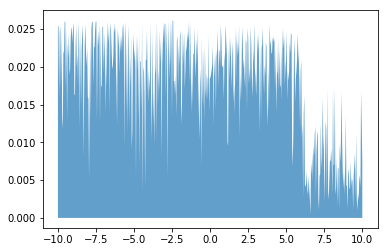

In [404]:
# Gaussian 2, for class 0
kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(train_df.query('Y==0')[['X1', 'X2']])
log_dens = kde.score_samples((train_df[['X1', 'X2']]))
x_d = np.linspace(-10, 10, 500)
plt.fill_between(x_d, np.exp(log_dens), alpha=0.7)

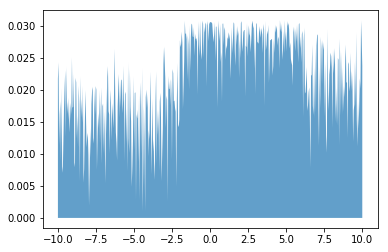

In [896]:
# Gaussian 2, for class 1
kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(train_df.query('Y==1')[['X1', 'X2']])
log_dens = kde.score_samples((train_df[['X1', 'X2']]))
x_d = np.linspace(-10, 10, 500)
plt.fill_between(x_d, np.exp(log_dens), alpha=0.7)


In [897]:
#these are the class specific densities for the diffrent bandwidths requested

#Using the Bayes decision rule with equal prior, find the posterior probability for the following data points:
ab1 = -0.5*cin1
c1bb = (np.sqrt(np.linalg.det(c1)))
#P(x|w1)
pxw1 = lambda x: (1/(2*np.pi*c1bb))*np.exp(x.T.dot(ab1.dot(x)))
ab0 = -0.5*cin0
c0bb = (np.sqrt(np.linalg.det(c0)))
#P(x|w0)
pxw0 = lambda x: (1/(2*np.pi*c0bb))*np.exp(x.T.dot(ab0.dot(x)))
totP = lambda x: 0.5*pxw1(x) + pxw0(x)*0.5

print('\npoint [5,0] has ')
print(100*pxw0(np.array([5,0]))*0.5/totP(np.array([5,0])))
print('% chance of being in 0')

print('\npoint [5,0] has ')
print(100*pxw1(np.array([5,0]))*0.5/totP(np.array([5,0])))
print('% chance of being in 1')

print('\npoint [0,2] has ')
print(100*pxw0(np.array([0,2]))*0.5/totP(np.array([0,2])))
print('% chance of being in 0')

print('\npoint [0,2] has ')
print(100*pxw1(np.array([0,2]))*0.5/totP(np.array([0,2])))
print('% chance of being in 1')

print('\npoint [0,0] has ')
print(100*pxw0(np.array([0,0]))*0.5/totP(np.array([0,0])))
print('% chance of being in 0')

print('\npoint [0,0] has ')
print(100*pxw1(np.array([0,0]))*0.5/totP(np.array([0,0])))
print('% chance of being in 1')


point [5,0] has 
99.99642145487249
% chance of being in 0

point [5,0] has 
0.0035785451275156845
% chance of being in 1

point [0,2] has 
10.800539423173346
% chance of being in 0

point [0,2] has 
89.19946057682664
% chance of being in 1

point [0,0] has 
41.324720675745795
% chance of being in 0

point [0,0] has 
58.675279324254205
% chance of being in 1


In [898]:
#Code a function for the K-nearest neighbor classifier. #Code a KNN
#The input should be the training data and K.
#here the input is also the point to clissify...

#take k and a data frame, and x to accept points to classify
#subtract x from X1,X2, then absolute value, then return the row with the min
#a not rigurous way to consider distance but simple to understand, and return minimum's index
wrap = lambda x: [x['X1'],x['X2']]
Dist = lambda df,x,y: abs(df[['X1','X2']]-[x,y]).sum(axis=1)
#given a vector, get the indices of the k smallest
gather = lambda k, v: np.argpartition(v, k)[:k]
#then for the data, gather the closest neighbors Y values and return the most frequent
KNN = lambda k, df, x,y: int((df.iloc[(gather(k, Dist(df,x,y))).values.tolist()][['Y']]).mode().values[0])

In [899]:
#classify the data points in the testing data using three settings: (a) K=1, (b) K=5, (c) K=9

#this is here to avoid problems with dataframe not working with bool
testin = wrap(test_df)
#if you want to change the number of neighboor or training data do it here
mKNN = lambda x,y: KNN(9,train_df,x,y)
results9 = list(map(mKNN,testin[0],testin[1]))
print('\ntest predictions for K=9')
print(list(results9)) 


#if you want to change the number of neighboor or training data do it here
mKNN = lambda x,y: KNN(5,train_df,x,y)
results5 = list(map(mKNN,testin[0],testin[1]))
print('\ntest predictions for K=5')
print(list(results5))

#if you want to change the number of neighboor or training data do it here
mKNN = lambda x,y: KNN(1,train_df,x,y)
results1 = list(map(mKNN,testin[0],testin[1]))
print('\ntest predictions for K=1')
print(list(results1)) 
flatten = lambda l: [item for sublist in l for item in sublist]
print('\nthe true classes\n')
trueY = flatten(list((test_df[['Y']].values.tolist())))
print(list(trueY)) 


test predictions for K=9
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

test predictions for K=5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [889]:
results1 = list(results1)
results5 = list(results5)
results9 = list(results9)
#filtering the prdictions according to if it was really 1
TP1 = [results1[i] for i in range(len(trueY)) if trueY[i] == 1]
TP5 = [results5[i] for i in range(len(trueY)) if trueY[i] == 1]
TP9 = [results9[i] for i in range(len(trueY)) if trueY[i] == 1]

#correct rate, y are the vectors to compare and v is 0/1 for if positive or negative is sought
rate = lambda y1, c: reduce(lambda a,b: a+b,list(map(lambda x: int(x==c), y1)))/len(y1)
trueY = list(trueY)

#For each setting, consider class “1” as disease cases and “0” as healthy controls. 
#Calculate the sensitivity and specificity. 
#sensetivity is true positive
print('sensetivity for K=9\n')
print(rate(TP9, 1))
print('sensetivity for K=5\n')
print(rate(TP5, 1))
print('sensetivity for K=1\n')
print(rate(TP1, 1))
#selectivity is the true negative
TN1 = [results1[i] for i in range(len(trueY)) if trueY[i] == 0]
TN5 = [results5[i] for i in range(len(trueY)) if trueY[i] == 0]
TN9 = [results9[i] for i in range(len(trueY)) if trueY[i] == 0]
print('selectivity for K=9\n')
print(rate(TN9, 0))
print('selectivity for K=5\n')
print(rate(TN5, 0))
print('selectivity for K=1\n')
print(rate(TN1, 0))

sensetivity for K=9

0.99
sensetivity for K=5

1.0
sensetivity for K=1

0.99
selectivity for K=9

0.94
selectivity for K=5

0.94
selectivity for K=1

0.89


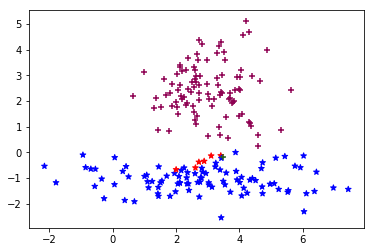

For K=9, * are 0, + are 1, red are * misclassified, green are + misclassified


In [986]:

import matplotlib.pyplot as plt
cluster = np.array(test_df['Y']) 
fig, ax = plt.subplots()

x = np.array(test_df['X1'])
y = np.array(test_df['X2'])
mc9 = list(map(lambda x, c: int(x!=c), results9,trueY))
mc90 = [mc9[i] for i in range(len(trueY)) if cluster[i] == 0]
mc91 = [mc9[i] for i in range(len(trueY)) if cluster[i] == 1]

ax.scatter(x[cluster==0],y[cluster==0], marker='*', c = mc90, cmap="bwr" )
ax.scatter(x[cluster==1],y[cluster==1], marker='+', c = mc91, cmap="PiYG" )

plt.show()
print('For K=9, * are 0, + are 1, red are * misclassified, green are + misclassified')

#Plot the testing data. Use different shape to show the true class labels, and color the misclassified points. 
m = test_df
mkr_dict = {'0': '+', '1': '*'}
for kind in mkr_dict:
    d = m[test_df['Y'] ==kind]
    test_df.plot.scatter(x = 'X1', y='X2', c = 'Y', marker = mkr_dict[kind], colormap='viridis')



#plt = test_df.plot.scatter(x='X1', y='X2', c = 'Y', colormap='viridis',marker='*')

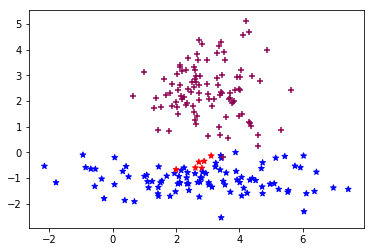

For K=5, * are 0, + are 1, red are * misclassified, green are + misclassified


In [990]:
fig, ax2 = plt.subplots()

mc5 = list(map(lambda x, c: int(x!=c), results5,trueY))
mc50 = [mc5[i] for i in range(len(trueY)) if cluster[i] == 0]
mc51 = [mc5[i] for i in range(len(trueY)) if cluster[i] == 1]

ax2.scatter(x[cluster==0],y[cluster==0], marker='*', c = mc50, cmap="bwr" )
ax2.scatter(x[cluster==1],y[cluster==1], marker='+', c = mc51, cmap="PiYG" )

plt.show()
print('For K=5, * are 0, + are 1, red are * misclassified, green are + misclassified')

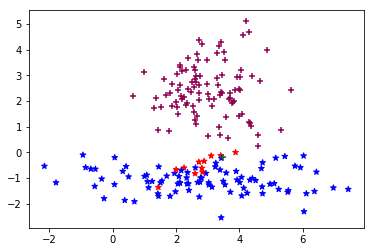

For K=1, * are 0, + are 1, red are * misclassified, green are + misclassified


In [993]:
fig, ax3 = plt.subplots()

mc1 = list(map(lambda x, c: int(x!=c), results1,trueY))
mc10 = [mc1[i] for i in range(len(trueY)) if cluster[i] == 0]
mc11 = [mc1[i] for i in range(len(trueY)) if cluster[i] == 1]

ax3.scatter(x[cluster==0],y[cluster==0], marker='*', c = mc10, cmap="bwr" )
ax3.scatter(x[cluster==1],y[cluster==1], marker='+', c = mc11, cmap="PiYG" )

plt.show()
print('For K=1, * are 0, + are 1, red are * misclassified, green are + misclassified')

In [1069]:
#Given the following data points:   x= 1, 2, 3, 4,…, 15,    y= cos(x)
x = list(range(1,16))
y = np.cos(x)

#Generate the basis for a cubic spline, with knots at 5 and 10.
#basis is given in slides as 
hCS = lambda e1,e2: lambda x,a,b, c,d, e,f: a*1 + b*x + c*x**2 + d*x**3 + e*(x-e1)**3 + f*(x-e2)**3
bas = hCS(5,10)
#this is the basis can be called as bas(x,...,f)

In [1081]:
#divide x to intervals and represent f(X) by a separate polynomial in each interval.
#knots give interval {(0,5), (5,10),(10,15)}
x1 = x[0:5]
y1 = y[0:5]
x2 = x[5:10]
y2 = y[5:10]
x3 = x[10:15]
y3 = y[10:15]
#I am not sure if you mean hand fit or use built in functions... here is a comporamise
#use least squares to find the parameters of the basis fxns
#this is being done with x1, y1 inorder to avoid having more unknowns than data so LS works
print('Design Matrix:\n')
popt1, pcov1 = sp.optimize.curve_fit(bas, np.concatenate([x1,x1]), np.concatenate([y1,y1]))
print('Parameters for region 1 ', popt1, '\n')
popt2, pcov2 = sp.optimize.curve_fit(bas, np.concatenate([x2,x2]), np.concatenate([y2,y2]))
print('Parameters for region 2 ', popt2, '\n')
popt3, pcov3 = sp.optimize.curve_fit(bas, np.concatenate([x3,x3]), np.concatenate([y3,y3]))
print('Parameters for region 3 ', popt3, '\n')


 
#Plot the original data points, and show the fitted data points in another color. 

Design Matrix:

Parameters for region 1  [33842.79873093 -5774.89222263  -298.30488356    68.35408481
  -116.7733328     48.4374441 ] 

Parameters for region 2  [30371.26761582 -5857.18923253   -64.58519921    45.48441057
   -86.60882601    41.25198404] 

Parameters for region 3  [-5.55093229e+04  1.12802021e+04 -5.52965057e+01 -6.96258546e+01
  1.42885132e+02 -7.32051007e+01] 



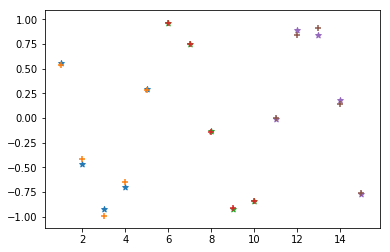

Interval 1: original orange data points, and fitted blue
Interval 2: true in red, fit in green
Interval 3: true in brown, fit in purple
As can be seen, peicewise cubics fit quite well despite how large and varied the fit B were. Doing ridge or lasso would still be a good idea...


In [1111]:
#Plot the original data points, and show the fitted data points in another color.
#the splines for each region
b1= lambda x: bas(x, popt1[0],popt1[1], popt1[2], popt1[3], popt1[4], popt1[5] )
b2= lambda x: bas(x, popt2[0],popt2[1], popt2[2], popt2[3], popt2[4], popt2[5] )
b3= lambda x: bas(x, popt3[0],popt3[1], popt3[2], popt3[3], popt3[4], popt3[5] )
#the fitted data
fit1 = map(b1,x1)
fit2 = map(b2,x2)
fit3 = map(b3,x3)
#scater plot of the original pink data points, and fitted green.

fig, ax = plt.subplots()

ax.scatter(x1,list(fit1), marker='*' )
ax.scatter(x1,y1, marker='+' )
ax.scatter(x2,list(fit2), marker='*' )
ax.scatter(x2,y2, marker='+' )
ax.scatter(x3,list(fit3), marker='*' )
ax.scatter(x3,y3, marker='+' )

plt.show()
print('Interval 1: original orange data points, and fitted blue\nInterval 2: true in red, fit in green\nInterval 3: true in brown, fit in purple')
print('As can be seen, peicewise cubics fit quite well despite how large and varied the fit B were. Doing ridge or lasso would still be a good idea...')